# Final Report on working with Tesseract text:

This Jupyter notebook file will document all of the Data Science for Social Good Code for Africa team's findings from working with the Kenya Gazettes database using Tesseract Optical Character Recogntion provided by the Code for Africa Project.

## Setup and imports

In [43]:
# for others to use this script, it will help to change this variable to
# whatever the route it to the root of your dssg-cfa folder.
ROUTETOROOTDIR = '/home/rthomp/DSSG/dssg-cfa/'

import os
import numpy as np
import csv
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from IPython.display import Image

os.chdir(ROUTETOROOTDIR + 'Segmentation Work on Tesseract Text/Robbie/py_files')
import setup
os.chdir(ROUTETOROOTDIR + 'Segmentation Work on Tesseract Text/Robbie/py_files')
#import extractingTitles
os.chdir(ROUTETOROOTDIR + 'Segmentation Work on Tesseract Text/Robbie/py_files')
import segmentExtraction

os.chdir(ROUTETOROOTDIR + 'Segmentation Work on Tesseract Text/Thea')
#import segment_dated

os.chdir(ROUTETOROOTDIR + 'Segmentation Work on Tesseract Text/T')
#import extracting_gazette_notice_numbers_per_page_final as extractingNo

## Outputs of this directory

Ultimately, our goal for this project is to extract names, entities, and relationships from the Kenya Gazettes database and place them within a network. This directory handles the extraction of names, entities, and relationships as best it can. The final output is at present just in the form of a csv file which contains rows which represent one notice of the heading "THE LAND REGISTRATION ACT" in a Kenyan gazette. Many entries in the csv are missing simply by nature of the fact that not all gazette entries contain the same information. Many more entries are missing because the text itself is difficult to work with, which we will discuss in greater detail later. Below is an example output, along with the code to generate it:

In [34]:
%%capture

# to generate a csv for a given gazette (there are roughly 6000 gazettes)
segmentExtraction.writeNamesAndAddresses(5104)

In [35]:
# read the csv to a pandas dataframe so that it can be visualized nicely
ex = pd.read_csv(ROUTETOROOTDIR + "Segmentation Work on Tesseract Text/" +
                 "Robbie/initialReports/Names_and_address: 5104.csv", engine='python')
ex

page number                                               name  \
0             3                          Leonard Charles Blackmore   
1             3          Salyiabai w/o Haji Essa (Trustee of Wakf)   
2             3  Seventh Day Adventist Church (East Africa Limi...   
3             3   (1) John Philip Luusa and (2) Irene Nthoki Luusa   
4             4                Margaret Syokau Munyao (ID/2986102)   
..          ...                                                ...   
78           14               (1) Boaz Omondi Ongoro (1D/13658167)   
79           57                       Zebedee Mwandi (ID/10114041)   
80           57                   Faith Kasiva Musau (ID/14403554)   
81           57                                                NaN   
82           57              Hellen Nyambura Waithaka (ID/2951261)   

                                              address       land size  \
0   P.O. Box 34444- 80100, Mombasa in the Republic...  0.0233 hectare   
1   P.O. Box 82359-80100, Mombasa in the Republic ...   0.031 hectare   
2               P.O. Box 42276-00100, Nairobi in the,  0.1778 hectare   
3   P.O. Box 48030-00100, Nairobi in the Republic ...  0.1778 hectare   
4   P.O. Box 39701, Nairobi in the Republic of Kenya,  0.0200 hectare   
..                                                ...             ...   
78       P.O. Box65, Oyugis in the Republic of Kenya,             NaN   
79                                                NaN   0.039 hectare   
80  P.O. Box 896- 00517, Nairobi in the Republic o...  0.0354 hectare   
81                                                NaN             NaN   
82    P.O.Box 17127, Nakuru in the Republic of Kenya,  0.0465 hectare   

     district                                title number plot number  \
0     Mombasa                                         NaN  MN/I/11097   
1         NaN                      Mombasa/Block XVII/135         NaN   
2         NaN                                         NaN         NaN   
3         NaN                                         NaN         NaN   
4     Nairobi                       Nairobi/Block 82/3616         NaN   
..        ...                                         ...         ...   
78  Rachuonyo                                         NaN         NaN   
79    Kajiado                     Kajiado/Kitengela/23131         NaN   
80    Kajiado                Kajiado/Kaputiei North/23318         NaN   
81        NaN                                         NaN         NaN   
82   Naivasha  Miti Mingi/Mbaruk Block 5/772(Kiungururia)         NaN   

     grant number  
0             NaN  
1             NaN  
2   I. R. 88732/1  
3             NaN  
4             NaN  
..            ...  
78            NaN  
79            NaN  
80            NaN  
81            NaN  
82            NaN  

[83 rows x 8 columns]

We would like to be very clear that this output is far from bug-free: in fact we estimate that roughly 70% of information is captured _just from the one section we looked in_ (namely, "THE LAND REGISTRATION ACT", which only occurs after 2012). A determined programmer could certainly extract more information. This output is merely meant to illustrate how much could be generated usign a reasonable amount of time and resources along with the challenges in gathering more. 

There is a lot of code which goes into creating this output which we will not discuss in great detail here. In order to understand how each file contributes to this output, we reccomend reading the file README.md.

## Issues with Tesseract Text

This piece of the project has been abandoned because the Tesseract OCR tool used by the Code for Africa project has a lot of trouble transcribing text in the format it appears in the gazettes. Specifically, most pages either appear as two columns each with blocks of text within or as tables. Some of the areas which Tesseract commited which we found particularly confounding are:
* segmentation errors (reading the text out of order)
* duplication of text
* general typos and misspellings

We will provide examples of each below. We randomly surveyed gazette pages (with a bias towards gazettes published after 2012) and documented the types of issues found in each page. A spreadsheet containing our findings can be found [here](https://docs.google.com/spreadsheets/d/1NZJbQbi-dMYajABEW1dCT3V6KkFH9ITRBQzOAWJQjm4/edit#gid=1700379504).

### Segmentation Errors

We define a segmentation error as when Tesseract reads across the middle divide in a two-column page, thus jumbling text out of order. This can make extracting relationships between entities quite difficult. In the worst case, Tesseract will jumble two paragraphs, make it nearly possible to determine which name belongs to which address, for example. An example is show below. It is named _gazette-ke-vol-CXXI-no-51-dated-26-April-2019-special_ (page 2) and can be found [here](https://data.connectedafrica.net/entities/242013.b915ba8085273ef1e3bf4e4f476a0ac7b41bd6c5#page=2).

Segmentation Errors of some variety occured in 56% of the gazette pages sampled.

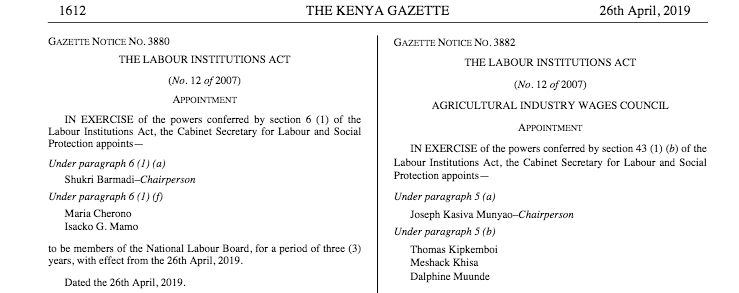

In [44]:
os.chdir(ROUTETOROOTDIR + 'Weekly Reports/Week_4/screenshots/segmentation_fault_bad')
Image(filename = 'seg_pdf_4_2019_2.png')

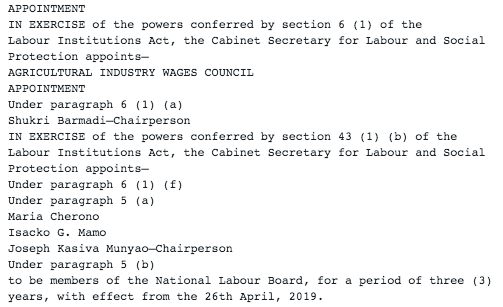

In [45]:
Image(filename = 'seg_text_4_2019_2.png')

### Duplication of Text

Often Tesseract will read over a portion or all of a PDF twice, producing two copies of the text in a PDF files. When the entire gazette was read twice, we noticed a pattern of the second transcription being better than the first. This issue is certainly surmountable given enough effort. Given that we only have 8 weeks on this project, having to deal with this was simply one more pain point than influence our decision in favor of using Microsoft Azure. An example is shown below. It is named _gazette-ke-vol-CXIX-no-186-dated-15-December-2017_ and can be found [here](https://data.connectedafrica.net/entities/240695.6b0f2894dc2508850fe7df9b36a1ff1c35ae316e#page=16).

Some amount of duplication of text occured in 53% of gazette pages we sampled.

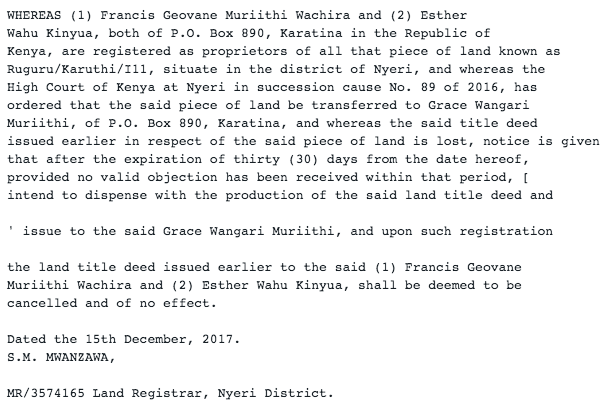

In [46]:
os.chdir(ROUTETOROOTDIR + 'Weekly Reports/Week_4/screenshots/duplicates')
Image(filename = 'duplicate_bad_15_2017_16.png')

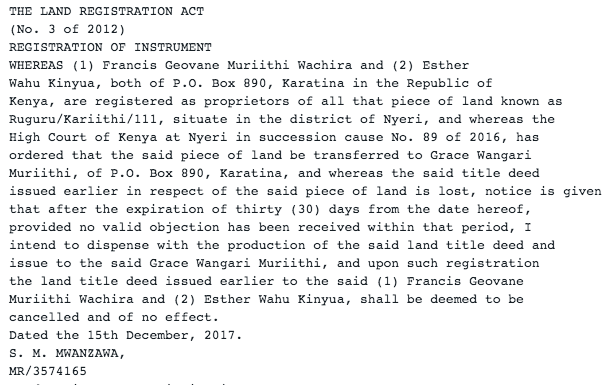

In [47]:
Image(filename = 'duplicate_good_15_2017_16.png')

### General Typos

Any OCR tool is bound to produce some amount of typos and mistranscriptions. Regardless, Tesseract certainly has produced more than Microsft's Read API. This becomes particularly problematic when trying to extract entities such as names and addresses: it is very hard to spell correct in this situation. An example is shown below. It is named _gazette-ke-vol-CXXI-no-34-dated-22-March-2019_ and can be found [here](https://data.connectedafrica.net/entities/195140.df8105e2da9ba5866205a2ab8a71a07cc0f0add5#page=8).

Tesseract produced a misspelling of a name or other entity on 13% of the gazette pages sampled.

Note that in this example, the name "Serah Njeri Kariuki" is mistranscribed as "Sera Niere Kiriuki." A small and understandable mistake, certainly, but one that will make network creation that much more difficult.

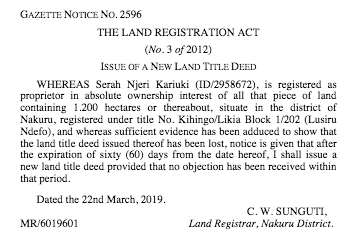

In [40]:
os.chdir(ROUTETOROOTDIR + 'Weekly Reports/Week_4/screenshots/name_typo_3_2019_8')
Image(filename = 'bad_name_pdf.png')

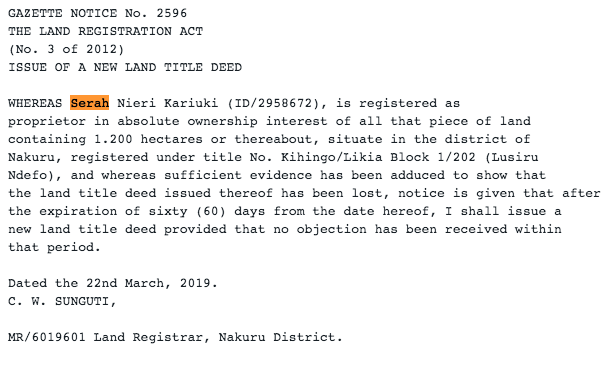

In [41]:
Image(filename = 'bad_name_wrong.png')

Note that each of the examples above occurred in gazettes printed in 2017 or later. Tesseract's issues were much more pronounced in older gazettes, but even the newest gazettes have some challenging issues.

All this being said, working with Tesseract text certainly is possible, especially if one limits oneself to working with much newer gazettes. However at this juncture we believe that using Microsoft Azure will yield much stronger results.